# Analysis of Employee Exit Surveys

We will work with the data of exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.
You can find the DETE exit survey data [here.](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)
Using this data, we will try to answer the following questions:

a) Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

b) Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

The data dictionary is as follows:

dete_survey.csv:

 - ID: An id used to identify the participant of the survey
 - SeparationType: The reason why the person's employment ended
 - Cease Date: The year or month the person's employment ended
 - DETE Start Date: The year the person began employment with the DETE
 
tafe_survey.csv:

 - Record ID: An id used to identify the participant of the survey
 - Reason for ceasing employment: The reason why the person's employment ended
 - LengthofServiceOverall. 
 - Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's start by reading the datasets into pandas and exploring them.

In [1]:
#loading the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
pd.set_option('display.max_columns', None)
plt.style.use("fivethirtyeight")
pd.options.mode.chained_assignment = None

In [2]:
#loading the datasets we need in dataframes.
dete=pd.read_csv("dete_survey.csv")
tafe=pd.read_csv("tafe_survey.csv")
dete.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
tafe.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

## Data Cleaning

Let us remove the columns we do not need in our analysis.

In [4]:
#removing columns we do not need
dete.drop(dete.columns[28:49],axis=1,inplace=True)
tafe.drop(tafe.columns[17:66],axis=1,inplace=True)

The column names of dete and tafe data are way too descriptive. Let us rename them to make them look homogenous and and to the point.

In [5]:
tafe=tafe.rename({"Record ID":"ID","CESSATION YEAR":"Cessation_Year",
           "Reason for ceasing employment":"Separation_Type",
          "Gender. What is your Gender?":"Gender",
          "CurrentAge. Current Age":"Age","Contributing Factors. Career Move - Public Sector ":"CareerMove_Public",
            "Contributing Factors. Career Move - Private Sector ":"CareerMove_Private",
            "Contributing Factors. Career Move - Self-employment":"Self_Employment",
            "Contributing Factors. Ill Health":"Ill_Health",
            "Contributing Factors. Maternity/Family":"Maternity/Family",
           "Contributing Factors. Dissatisfaction":"Dissatisfaction",
            "Contributing Factors. Job Dissatisfaction":"Job_Dissatisfaction",
            "Contributing Factors. Interpersonal Conflict":"Interpersonal_Conflict",
            "Contributing Factors. Study":"Study","Contributing Factors. Travel":"Travel",
            "Contributing Factors. Other":"Other","Contributing Factors. NONE":"None",
           "Employment Type. Employment Type":"Employment_Status",
           "LengthofServiceOverall. Overall Length of Service at Institute (in years)":"Service_Length_Institute(years)",
            "Classification. Classification":"Position",     
           "LengthofServiceCurrent. Length of Service at current workplace (in years)":"Service_Length_Role(years)"},axis=1)

In [6]:
tafe.columns

Index(['ID', 'Institute', 'WorkArea', 'Cessation_Year', 'Separation_Type',
       'CareerMove_Public', 'CareerMove_Private', 'Self_Employment',
       'Ill_Health', 'Maternity/Family', 'Dissatisfaction',
       'Job_Dissatisfaction', 'Interpersonal_Conflict', 'Study', 'Travel',
       'Other', 'None', 'Gender', 'Age', 'Employment_Status', 'Position',
       'Service_Length_Institute(years)', 'Service_Length_Role(years)'],
      dtype='object')

In [7]:
dete=dete.rename({"SeparationType":"Separation_Type","Employment Status":"Employment_Status",
                "Career move to public sector":"CareerMove_Public",
                "Career move to private sector":"CareerMove_Private",
               "Interpersonal conflicts":"Interpersonal_Conflict",
                "Job dissatisfaction":"Job_Dissatisfaction",
                "Ill Health":"Ill_Health",
                "None of the above":"None",
               "Dissatisfaction with the department":"Department_Dissatisfaction"},
                 axis=1
                )

In [8]:
dete.columns

Index(['ID', 'Separation_Type', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment_Status', 'CareerMove_Public',
       'CareerMove_Private', 'Interpersonal_Conflict', 'Job_Dissatisfaction',
       'Department_Dissatisfaction', 'Physical work environment',
       'Lack of recognition', 'Lack of job security', 'Work location',
       'Employment conditions', 'Maternity/family', 'Relocation',
       'Study/Travel', 'Ill_Health', 'Traumatic incident', 'Work life balance',
       'Workload', 'None', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

Let us also remove dete columns that are related to location like **ABOROGINAL, TORRES and STRAIT.**

In [9]:
dete.drop(dete.columns[30:33],axis=1,inplace=True)
dete.columns

Index(['ID', 'Separation_Type', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment_Status', 'CareerMove_Public',
       'CareerMove_Private', 'Interpersonal_Conflict', 'Job_Dissatisfaction',
       'Department_Dissatisfaction', 'Physical work environment',
       'Lack of recognition', 'Lack of job security', 'Work location',
       'Employment conditions', 'Maternity/family', 'Relocation',
       'Study/Travel', 'Ill_Health', 'Traumatic incident', 'Work life balance',
       'Workload', 'None', 'Gender', 'Age', 'Disability', 'NESB'],
      dtype='object')

In [10]:
dete["Cease Date"].unique()

array(['08/2012', '05/2012', '07/2012', '2012', '2013', '2014', '2010',
       '09/2013', '07/2013', '08/2013', '06/2013', '04/2013', '05/2013',
       '09/2010', '01/2014', '11/2012', '04/2014', '12/2013', '07/2014',
       '10/2013', '11/2013', 'Not Stated', '09/2014', '07/2006',
       '02/2014'], dtype=object)

The date columns in dete data contain **NOT STATED** instead of NaN. Let us replace those with *NAN*.

In [11]:
dete["Cease Date"].replace({"Not Stated":np.nan},inplace=True)
dete["Role Start Date"].replace({"Not Stated":np.nan},inplace=True)
dete["DETE Start Date"].replace({"Not Stated":np.nan},inplace=True)
dete["Cease Date"].unique()

array(['08/2012', '05/2012', '07/2012', '2012', '2013', '2014', '2010',
       '09/2013', '07/2013', '08/2013', '06/2013', '04/2013', '05/2013',
       '09/2010', '01/2014', '11/2012', '04/2014', '12/2013', '07/2014',
       '10/2013', '11/2013', nan, '09/2014', '07/2006', '02/2014'],
      dtype=object)

Let us only extract the year from the date columns and rename those columns.

In [12]:
dete["Cease Date"]=dete["Cease Date"].str.split("/").str.get(-1)
dete["Role Start Date"]=dete["Role Start Date"].str.split("/").str.get(-1)
dete["DETE Start Date"]=dete["DETE Start Date"].str.split("/").str.get(-1)

dete=dete.rename({"Cease Date":"Cessation_Year","Role Start Date":"Role_Start_Year",
            "DETE Start Date":"DETE_Start_Year"},axis=1)

We will now change these dates columns' type to float from str, so that we can subtract them to get length of the services.

In [13]:
dete["Cessation_Year"]=dete["Cessation_Year"].astype(float)
dete["DETE_Start_Year"]=dete["DETE_Start_Year"].astype(float)
dete["Role_Start_Year"]=dete["Role_Start_Year"].astype(float)

#making new service length columns in dete data
dete["Service_Length_Institute(years)"]=dete["Cessation_Year"]-dete["DETE_Start_Year"]
dete["Service_Length_Role(years)"]=dete["Cessation_Year"]-dete["Role_Start_Year"]

Let us now observe Age column in dete and tafe data.

In [14]:
tafe["Age"].unique()

array(['26  30', nan, '41  45', '56 or older', '20 or younger', '46  50',
       '36  40', '21  25', '51-55', '31  35'], dtype=object)

Let us replace space with hyphen to denote the age brackets.

In [15]:
tafe["Age"]=tafe["Age"].str.replace("  ","-")
tafe["Age"].unique()

array(['26-30', nan, '41-45', '56 or older', '20 or younger', '46-50',
       '36-40', '21-25', '51-55', '31-35'], dtype=object)

In [16]:
dete["Age"].unique()

array(['56-60', '61 or older', '36-40', '41-45', '31-35', '46-50',
       '51-55', '21-25', '26-30', nan, '20 or younger'], dtype=object)

Let us make them uniform and similar to age brackets in tafe data. This will help in making our comparisons between the two datasets relevant.

In [17]:
dete.loc[dete["Age"]=="61 or older","Age"]="56 or older"
dete.loc[dete["Age"]=="56-60","Age"]="56 or older"
dete["Age"].unique()

array(['56 or older', '36-40', '41-45', '31-35', '46-50', '51-55',
       '21-25', '26-30', nan, '20 or younger'], dtype=object)

Let us look at the Dissatisfaction and Job_Dissatisfaction in tafe data.

In [18]:
tafe["Dissatisfaction"].unique()

array([nan, '-', 'Contributing Factors. Dissatisfaction '], dtype=object)

In [19]:
tafe["Job_Dissatisfaction"].unique()

array([nan, '-', 'Job Dissatisfaction'], dtype=object)

Let us replace "nan" by np.nan values, "-" by False and "Contributing Factors. Dissatisfaction" by True. 

In [20]:
d={"Contributing Factors. Dissatisfaction ":True,"-":False,"nan":np.nan}
tafe["Dissatisfaction"]=tafe["Dissatisfaction"].map(d)

Let us replace "nan" by np.nan values, "-" by False and "Job Dissatisfaction" by True. 

In [21]:
d={"Job Dissatisfaction":True,"-":False,"nan":np.nan}
tafe["Job_Dissatisfaction"]=tafe["Job_Dissatisfaction"].map(d)

The corresponding tafe columns are already clean.

In [22]:
tafe.loc[:,["Job_Dissatisfaction","Dissatisfaction"]]

,Job_Dissatisfaction,Dissatisfaction
0,NaN,NaN
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
697,False,False
698,False,False
699,False,False
700,NaN,NaN


Let us create a column **Dissatisfied** in our tafe data, which will hold True if any of the columns, Job_Dissatisfaction or Dissatisfaction are True, otherwise False.

In [23]:
def diss(df):
    if (pd.isna(df["Job_Dissatisfaction"]))&(pd.isna(df["Dissatisfaction"])):
        return np.nan
    elif (df["Job_Dissatisfaction"]|df["Dissatisfaction"]):
        return True
    else:
        return False
tafe["Dissatisfied"]=tafe.apply(diss,axis=1)
tafe.loc[:,["Job_Dissatisfaction","Dissatisfaction","Dissatisfied"]]

,Job_Dissatisfaction,Dissatisfaction,Dissatisfied
0,NaN,NaN,NaN
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
697,False,False,False
698,False,False,False
699,False,False,False
700,NaN,NaN,NaN


And similarly a column **Dissatisfied** in dete data based on Job_Dissatisfaction and Department_Dissatisfaction columns.

In [24]:
def diss(df):
    if (pd.isna(df["Job_Dissatisfaction"]))&(pd.isna(df["Department_Dissatisfaction"])):
        return np.nan
    elif (df["Job_Dissatisfaction"]|df["Department_Dissatisfaction"]):
        return True
    else:
        return False
dete["Dissatisfied"]=dete.apply(diss,axis=1)
dete.loc[:,["Job_Dissatisfaction","Department_Dissatisfaction","Dissatisfied"]]

,Job_Dissatisfaction,Department_Dissatisfaction,Dissatisfied
0,True,False,True
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
817,False,False,False
818,False,False,False
819,False,False,False
820,False,False,False


Let us now create groups for Service_Length_Institute and Service_Length_Role in dete data, similar to those in tafe data.

In [25]:
dete["Service_Length_Institute_yr_grp"]=np.nan
dete.loc[(dete["Service_Length_Institute(years)"]<1),"Service_Length_Institute_yr_grp"]="Less than 1 year"       
dete.loc[(dete["Service_Length_Institute(years)"]>=1)&(dete["Service_Length_Institute(years)"]<=2),"Service_Length_Institute_yr_grp"]="1-2"
dete.loc[(dete["Service_Length_Institute(years)"]>=3)&(dete["Service_Length_Institute(years)"]<=4),"Service_Length_Institute_yr_grp"]="3-4"
dete.loc[(dete["Service_Length_Institute(years)"]>=5)&(dete["Service_Length_Institute(years)"]<=6),"Service_Length_Institute_yr_grp"]="5-6"
dete.loc[(dete["Service_Length_Institute(years)"]>=7)&(dete["Service_Length_Institute(years)"]<=10),"Service_Length_Institute_yr_grp"]="7-10"
dete.loc[(dete["Service_Length_Institute(years)"]>=11)&(dete["Service_Length_Institute(years)"]<=20),"Service_Length_Institute_yr_grp"]="11-20"
dete.loc[(dete["Service_Length_Institute(years)"]>20),"Service_Length_Institute_yr_grp"]="More than 20 years"
dete["Service_Length_Institute(years)"]=dete["Service_Length_Institute_yr_grp"]

In [26]:
dete["Service_Length_Role_yr_grp"]=np.nan
dete.loc[(dete["Service_Length_Role(years)"]<1),"Service_Length_Role_yr_grp"]="Less than 1 year"       
dete.loc[(dete["Service_Length_Role(years)"]>=1)&(dete["Service_Length_Role(years)"]<=2),"Service_Length_Role_yr_grp"]="1-2"
dete.loc[(dete["Service_Length_Role(years)"]>=3)&(dete["Service_Length_Role(years)"]<=4),"Service_Length_Role_yr_grp"]="3-4"
dete.loc[(dete["Service_Length_Role(years)"]>=5)&(dete["Service_Length_Role(years)"]<=6),"Service_Length_Role_yr_grp"]="5-6"
dete.loc[(dete["Service_Length_Role(years)"]>=7)&(dete["Service_Length_Role(years)"]<=10),"Service_Length_Role_yr_grp"]="7-10"
dete.loc[(dete["Service_Length_Role(years)"]>=11)&(dete["Service_Length_Role(years)"]<=20),"Service_Length_Role_yr_grp"]="11-20"
dete.loc[(dete["Service_Length_Role(years)"]>20),"Service_Length_Role_yr_grp"]="More than 20 years"       
dete["Service_Length_Role(years)"]=dete["Service_Length_Role_yr_grp"]

Some columns in tafe data have ambiguous values. Let us convert them into boolean values.

In [27]:
tafe.head()

,ID,Institute,WorkArea,Cessation_Year,Separation_Type,CareerMove_Public,CareerMove_Private,Self_Employment,Ill_Health,Maternity/Family,Dissatisfaction,Job_Dissatisfaction,Interpersonal_Conflict,Study,Travel,Other,None,Gender,Age,Employment_Status,Position,Service_Length_Institute(years),Service_Length_Role(years),Dissatisfied
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26-30,Temporary Full-time,Administration (AO),1-2,1-2,NaN
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,False,False,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,False,False,-,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN,False
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,False,False,-,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,False,False,-,-,-,-,-,Male,41-45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


Let us convert them to boolean values so that it makes our analysis easier

In [28]:
tafe.loc[tafe["CareerMove_Private"]=="-","CareerMove_Private"]=False
tafe.loc[tafe["CareerMove_Private"]=="Career Move - Private Sector","CareerMove_Private"]=True
tafe.loc[tafe["CareerMove_Public"]=="-","CareerMove_Public"]=False
tafe.loc[tafe["CareerMove_Public"]=="Career Move - Public Sector","CareerMove_Public"]=True
tafe.loc[tafe["Maternity/Family"]=="-","Maternity/Family"]=False
tafe.loc[tafe["Maternity/Family"]=="Maternity/Family","Maternity/Family"]=True
tafe.loc[tafe["Interpersonal_Conflict"]=="-","Interpersonal_Conflict"]=False
tafe.loc[tafe["Interpersonal_Conflict"]=="Interpersonal Conflict","Interpersonal_Conflict"]=True
tafe.loc[tafe["Study"]=="-","Study"]=False
tafe.loc[tafe["Study"]=="Study","Study"]=True
tafe.loc[tafe["Travel"]=="-","Travel"]=False
tafe.loc[tafe["Travel"]=="Travel","Travel"]=True
tafe.loc[tafe["Self_Employment"]=="-","Self_Employment"]=False
tafe.loc[tafe["Self_Employment"]=="Self Employment","Self_Employment"]=True
tafe.head()

,ID,Institute,WorkArea,Cessation_Year,Separation_Type,CareerMove_Public,CareerMove_Private,Self_Employment,Ill_Health,Maternity/Family,Dissatisfaction,Job_Dissatisfaction,Interpersonal_Conflict,Study,Travel,Other,None,Gender,Age,Employment_Status,Position,Service_Length_Institute(years),Service_Length_Role(years),Dissatisfied
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26-30,Temporary Full-time,Administration (AO),1-2,1-2,NaN
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,False,False,False,-,False,False,False,False,False,True,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,False,False,False,-,False,False,False,False,False,False,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN,False
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,False,False,False,-,False,False,False,False,False,True,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,False,True,False,-,False,False,False,False,False,False,-,-,Male,41-45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


Let us create a column Study/Travel in tafe data which holds True if any of Study or Travel column is True. This column is created to match Study/Travel column in dete data for easier comparisns further.

In [29]:
def st(df):
    if (pd.isna(df["Study"]))&(pd.isna(df["Travel"])):
        return np.nan
    elif (df["Study"]|df["Travel"]):
        return True
    else:
        return False
tafe["Study/Travel"]=tafe.apply(st,axis=1)
tafe.head()

,ID,Institute,WorkArea,Cessation_Year,Separation_Type,CareerMove_Public,CareerMove_Private,Self_Employment,Ill_Health,Maternity/Family,Dissatisfaction,Job_Dissatisfaction,Interpersonal_Conflict,Study,Travel,Other,None,Gender,Age,Employment_Status,Position,Service_Length_Institute(years),Service_Length_Role(years),Dissatisfied,Study/Travel
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,26-30,Temporary Full-time,Administration (AO),1-2,1-2,NaN,NaN
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,False,False,False,-,False,False,False,False,False,True,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,False,False,False,-,False,False,False,False,False,False,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN,False,False
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,False,False,False,-,False,False,False,False,False,True,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,False,True,False,-,False,False,False,False,False,False,-,-,Male,41-45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,False


Let us extract only the resignations data because we need to answer the two questions regarding resignations, we will just focus on them for now.

In [30]:
#dete resignations
dete_resignations=dete[(dete["Separation_Type"]=="Resignation-Other reasons")|
                      (dete["Separation_Type"]=="Resignation-Other employer")|
                      (dete["Separation_Type"]=="Resignation-Move overseas/interstate")]
tafe_resignations=tafe[tafe["Separation_Type"]=="Resignation"]
dete_resignations.shape

(311, 37)

In [31]:
#tafe resignations
tafe_resignations.shape

(340, 25)

Now we will add one more column **institute** to both of the data frames which stores the institute name for all of the rows.

In [32]:
dete_resignations["institute"]="DETE"
tafe_resignations["institute"]="TAFE"

Because we need to combine both the dataframes for our analysis, we will concat them and store them in **combined** dataframe.

In [33]:
combined=pd.concat([dete_resignations,tafe_resignations])
combined.tail()

,ID,Separation_Type,Cessation_Year,DETE_Start_Year,Role_Start_Year,Position,Classification,Region,Business Unit,Employment_Status,CareerMove_Public,CareerMove_Private,Interpersonal_Conflict,Job_Dissatisfaction,Department_Dissatisfaction,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill_Health,Traumatic incident,Work life balance,Workload,None,Gender,Age,Disability,NESB,Service_Length_Institute(years),Service_Length_Role(years),Dissatisfied,Service_Length_Institute_yr_grp,Service_Length_Role_yr_grp,institute,Institute,WorkArea,Self_Employment,Maternity/Family,Dissatisfaction,Study,Travel,Other
696,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-,NaN,NaN,NaN,-,Male,21-25,NaN,NaN,5-6,5-6,False,NaN,NaN,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),False,False,False,False,False,-
697,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-,NaN,NaN,NaN,-,Male,51-55,NaN,NaN,1-2,1-2,False,NaN,NaN,TAFE,Barrier Reef Institute of TAFE,Delivery (teaching),False,False,False,False,False,-
698,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,TAFE,Southern Queensland Institute of TAFE,Non-Delivery (corporate),False,False,False,False,False,-
699,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,-,NaN,NaN,NaN,-,Female,51-55,NaN,NaN,5-6,1-2,False,NaN,NaN,TAFE,Tropical North Institute of TAFE,Delivery (teaching),False,False,False,False,False,Other
701,6.350730e+17,Resignation,2013.0,NaN,NaN,Administration (AO),NaN,NaN,NaN,Contract/casual,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,-,NaN,NaN,NaN,-,Female,26-30,NaN,NaN,3-4,1-2,False,NaN,NaN,TAFE,Tropical North Institute of TAFE,Non-Delivery (corporate),Career Move - Self-employment,False,False,False,True,-


Let us now exit (phew!) from Data Cleaning and move on to Analysis of the data.

## Analysis

### 1) Age

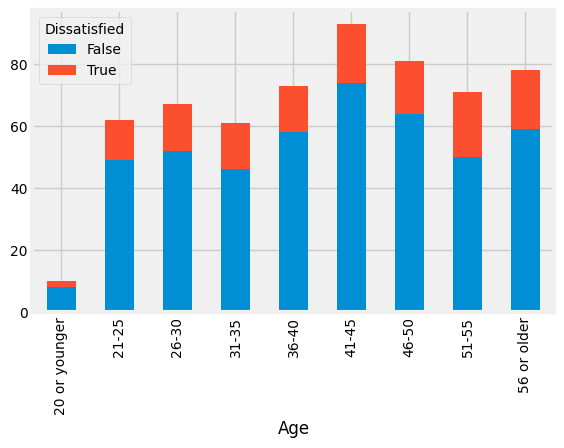

In [34]:
%matplotlib inline
combined.groupby(["Age","Dissatisfied"]).size().unstack(level=1).plot(kind="bar",stacked=True)

For the combined resignations data, we see that dissatisfaction is most observed in the **age group 51-55** and the least is observed in **20 or younger** group.

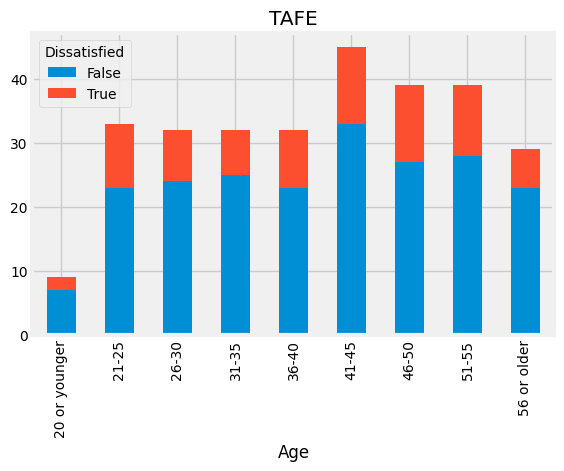

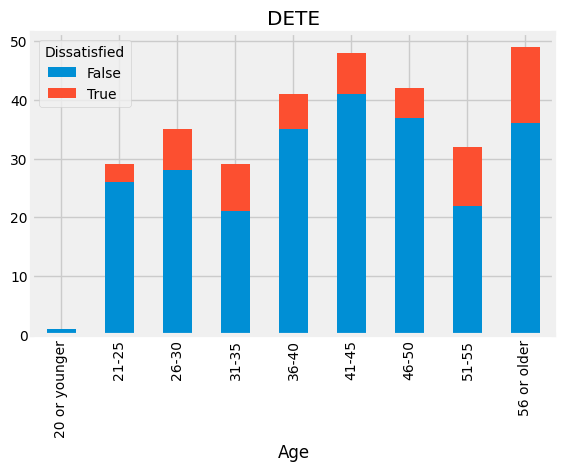

In [35]:
a=combined.groupby(["Age","Dissatisfied","institute"]).size().unstack(level=1).reset_index()
for i in set(a["institute"]):
    a[a["institute"]==i].plot(x="Age",kind="bar",stacked=True)
    plt.title(i)

If we look at the institutes individually, we can easily observe that for Dete resignations, **56 or older** is most dissatisfied and for Tafe resignations, **41-45,46-50 and 51-55** groups are most dissatisfied. 

Now let us observe the service length of these employees in their respective insititutes.

### 2) Service Length Institute (in years).

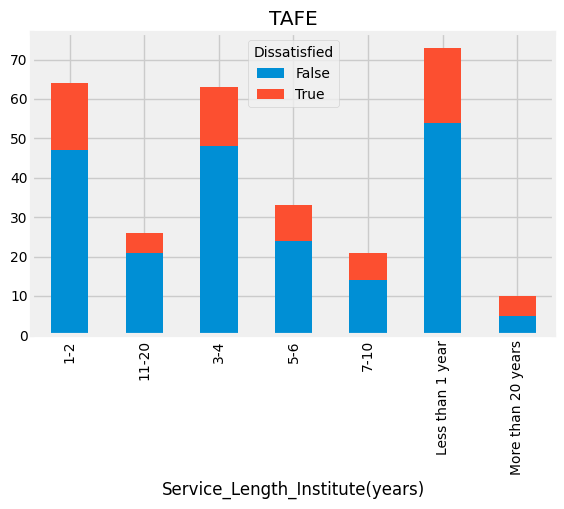

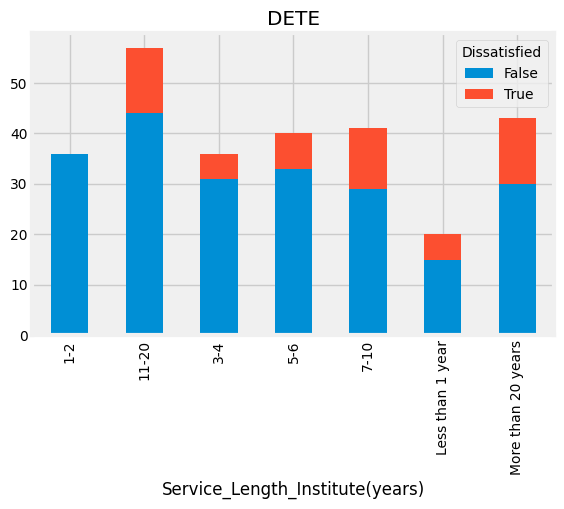

In [36]:

a=combined.groupby(["Service_Length_Institute(years)","Dissatisfied","institute"]).size().unstack(level=1).reset_index()
for i in set(a["institute"]):
    ax=a[a["institute"]==i].plot(x="Service_Length_Institute(years)",kind="bar",stacked=True)
    plt.title(i)
 

We can observe, that for dete resignations data, more employees that have been with the institute for longer are dissatisfied.
In tafe resignations data, more employees that are relatively new in the institute are dissatisfied.

### 3) Gender

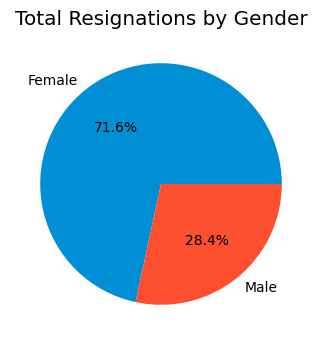

In [37]:
combined["Gender"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("")
plt.title("Total Resignations by Gender")
plt.show()

Overall, a higher percentage (71.6%) of females resigned from the institutes as compared to males (28.4%).

Let us see how many of them are dissatisfied.

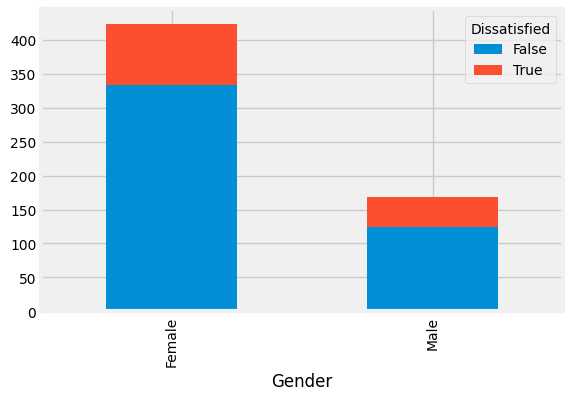

In [38]:
combined.groupby(["Gender","Dissatisfied"]).size().unstack(level=1).plot.bar(stacked=True)

Larger portion of females who resigned are dissatisfied as compared to males.

Now we will look at other possible reasons for resignations and whether those reasons are significant to different genders or not.

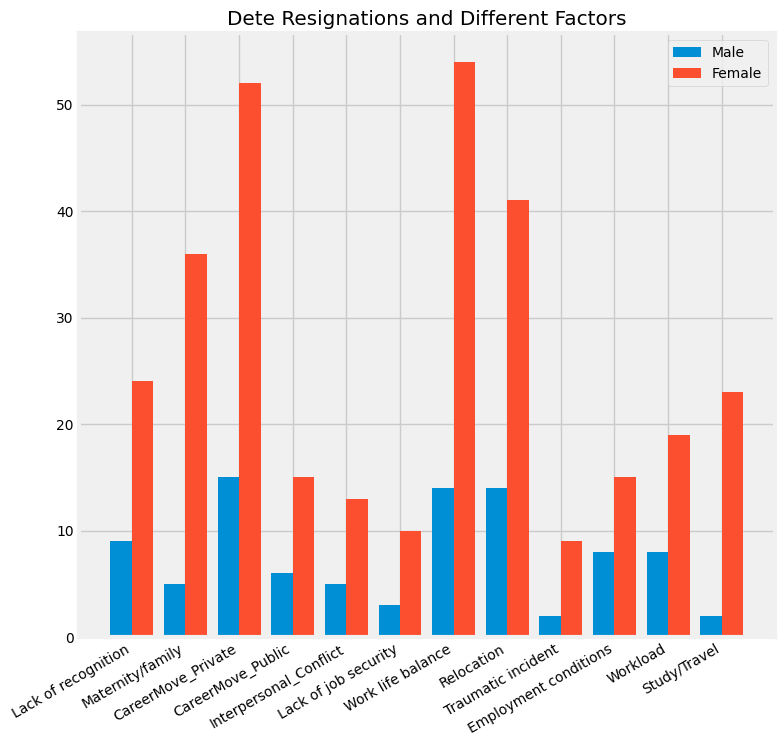

In [39]:
a=dete_resignations.groupby("Gender")[["Lack of recognition","Maternity/family","CareerMove_Private","CareerMove_Public","Interpersonal_Conflict","Lack of job security","Work life balance","Relocation","Traumatic incident","Employment conditions","Workload","Study/Travel"]].sum()
plt.figure(figsize=(8,8))
x=np.arange(a.shape[1])
plt.bar(x - 0.2,a.loc["Male"] , 0.4, label = 'Male')
plt.bar(x + 0.2, a.loc["Female"], 0.4, label = 'Female')
plt.legend()
plt.xticks(x,a.columns,rotation=30,horizontalalignment='right')
plt.title("Dete Resignations and Different Factors")
plt.show()

For every category, we observe that the number of females choosing the reason for resignation are higher than their male counterparts.
But some factors are much more frequent for females like **Work Life Balance, Relocation, Maternity/Family and CareerMove_Private.**

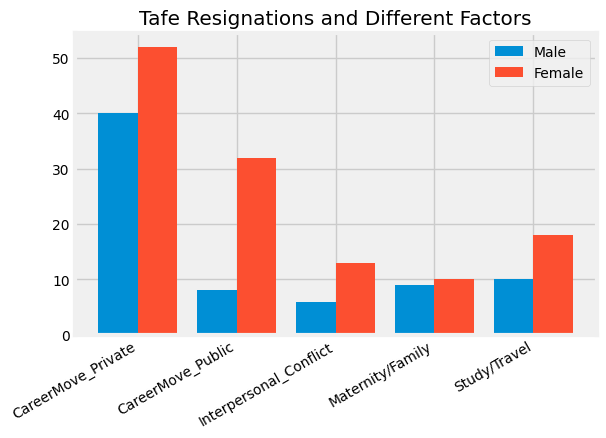

In [40]:
a=tafe_resignations.groupby("Gender")[["CareerMove_Private","CareerMove_Public","Interpersonal_Conflict" ,'Maternity/Family',"Self_Employment","Study/Travel"]].sum()
x=np.arange(a.shape[1])
plt.bar(x - 0.2,a.loc["Male"] , 0.4, label = 'Male')
plt.bar(x + 0.2, a.loc["Female"], 0.4, label = 'Female')
plt.legend()
plt.xticks(x,a.columns,rotation=30,horizontalalignment='right')
plt.title("Tafe Resignations and Different Factors")
plt.show()


Unlike dete data, the number of females are choosing a particular factor in the survey are not substantially higher than number of males.  The only significant difference is observed for the reason ,**CareerMove_Public**.

### 3)  Other Factors

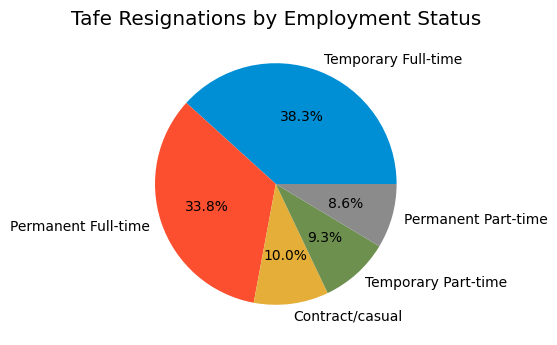

In [41]:
tafe_resignations["Employment_Status"].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.ylabel("")
plt.title("Tafe Resignations by Employment Status")
plt.show()

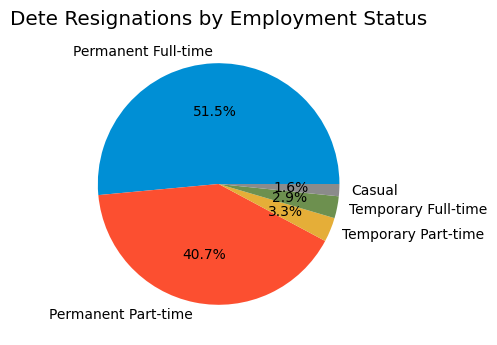

In [42]:
dete_resignations["Employment_Status"].value_counts().plot(kind="pie",autopct='%1.1f%%')
plt.ylabel("")
plt.title("Dete Resignations by Employment Status")
plt.show()

From Tafe institute, mostly, **Temporary Full-time** workers have resigned and from Dete institute, mostly, **Permanent Full-time** workers have resigned.

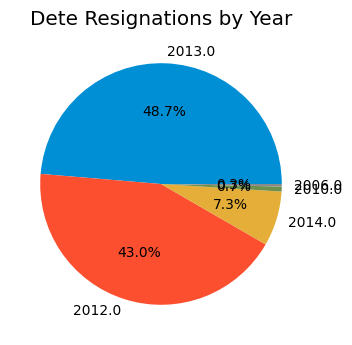

In [43]:
dete_resignations["Cessation_Year"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("")
plt.title("Dete Resignations by Year")
plt.show()

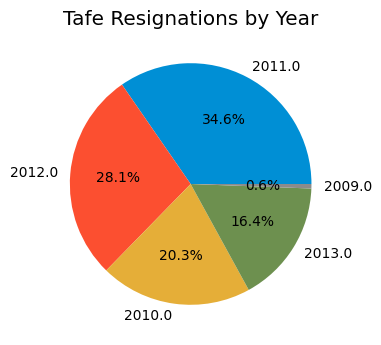

In [44]:
tafe_resignations["Cessation_Year"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.ylabel("")
plt.title("Tafe Resignations by Year")
plt.show()

From **Dete institute, most resignations were observed in the year 2013** and from **Tafe institute, most resignations were observed in the year 2011.**

## Conclusions.

1. For the combined resignations data, we see that dissatisfaction is most observed in the **age group 51-55** and the least is observed in **20 or younger** group. This means that older employees are much more dissatisfied with the institute or job they are working in, than the younger employees.

2. We can observe, more dissatisfied employees that have resigned from DETE have been with the institute for **longer**.
More dissatisfied employees that have resigned from TAFE are **relatively new** in the institute.

3. Overall, a higher percentage **(71.6%)** of females resigned from the institutes as compared to males **(28.4%)**. Larger portion of females who resigned are dissatisfied as compared to males.

4. From Tafe institute, mostly, **Temporary Full-time** workers have resigned and from Dete institute, mostly, **Permanent Full-time** workers have resigned.

5. From **Dete institute, most resignations were observed in the year 2013** and from **Tafe institute, most resignations were observed in the year 2011.**

6. In DETE survey, we observe that the number of females choosing the reason for resignation are higher than their male counterparts.
But some factors are much more frequent for females like **Work Life Balance, Relocation, Maternity/Family and CareerMove_Private.**
In TAFE institute, unlike dete, the number of females are choosing a particular factor in the survey are not substantially higher than number of males.  The only significant difference is observed for the reason ,**CareerMove_Public**.

## Steps that can be further taken by the Institutes.

1. Much more females resigned than males overall, due to some kind of dissatisfaction. Also, DETE institute needs to look into the provisions that they are providing to the employees, like ensuring work life balance and giving adequate maternity leaves/salary.
2. Dissatisfaction is higher in older employees as compared to younger ones. The institutes should make the older employees feel more valued. More flexible schedules and additional training can be offered to them in order to retain them in the company.
3. DETE institute's experienced employees are much more dissastisfied. The institute can look if their higher management is working properly, if their salaries are competent or if their are being promoted after years of working with the institute.
4. TAFE institute's newer employees are much more dissatisfied. One can check if their onboarding process was smooth or if they are being given proper and appropriate training.
5. More workers resigned in 2011 from TAFE and in 2013 from DETE. The institutes should observe if this happened due to any manjor changes in policies of the company.